<a href="https://colab.research.google.com/github/Zz71198/supabase/blob/master/Programaci%C3%B3n_para_Qu%C3%ADmicos_Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antes de iniciar por favor ejecuten 👇

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/Shared drives/Programación para químicos"
!ls

Mounted at /content/drive
/content/drive/Shared drives/Programación para químicos
'Memes para reutilizar'  'Módulo - átomos y moléculas'


# Introducción

¡Hola a todos! Nos presentamos: somos Danka Valeria Pérez Rojas y Juan Diego Pérez Bohórquez, y sí, somos estudiantes de química. Esperamos que este pequeño curso les sirva para adquirir el gusto por la programación y los motive a hacer grandes descubrimientos usando esta valiosa herramienta. Y no es para menos, la programación se perfila como una habilidad que todo el mundo deberá tener en esta nueva era científica y tecnológica.

Una muestra de la importancia de la computación en química se refleja incluso en el **Premio Nobel de Química** en distintas ocasiones:

* **1998** – John Pople recibió el Nobel por el desarrollo de métodos computacionales en Química Cuántica.
* **2013** – Martin Karplus, Michael Levitt y Arieh Warshel fueron galardonados por el desarrollo de modelos computacionales para estudiar reacciones químicas complejas.
* **2024** – *David Baker, Demis Hassabis y John M. Jumper recibieron el premio por sus avances en el diseño computacional de proteínas y la predicción de sus estructuras mediante el uso de inteligencia artificial.*

Como pueden ver, la programación y la química están cada vez más ligadas. A continuación, les mostraremos una pequeña aplicación de código para evidenciar **cómo ha aumentado la cantidad de publicaciones en química que incluyen términos relacionados con programación** a lo largo del tiempo. Para ello, utilizaremos Python para consultar la base de datos de publicaciones académicas *Crossref* y visualizar resultados. ¡Veamos qué encontramos!

> **Nota:** Para ejecutar el código en Colab, haz clic en el botón de “Play” ▶️ a la izquierda de la celda de código.

Estadística de artículos por año (primeros 5 años):
    Año  Artículos totales
0  1980              30607
1  1981              30342
2  1982              31348
3  1983              31379
4  1984              32429


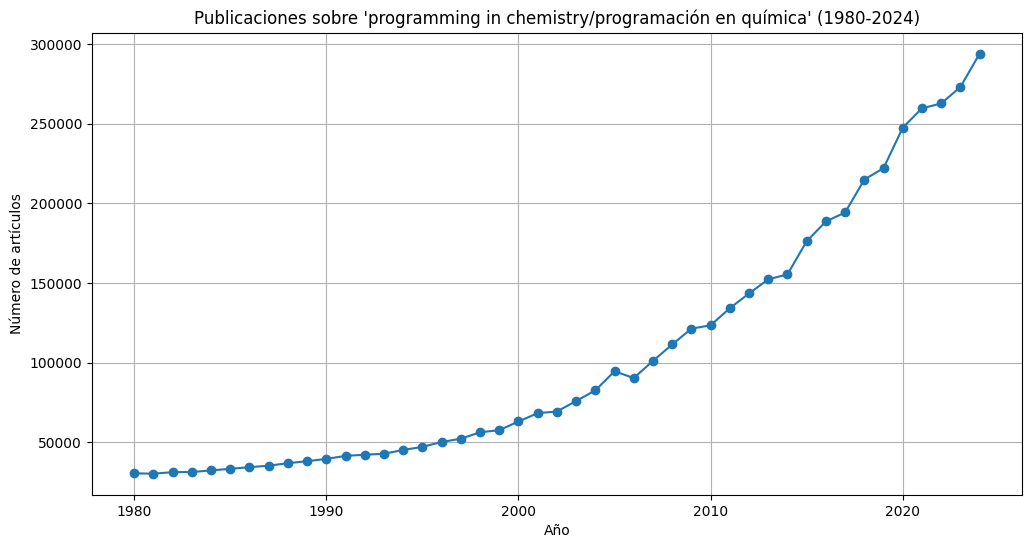

In [9]:
# @title Gráfico publicaciones
# Gráfico 1: Evolución de publicaciones sobre "programación en química" (1980-2024)
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Lista de años desde 1980 hasta 2024
years = list(range(1980, 2025))
data = []

# Iteramos sobre cada año para consultar la API de Crossref en español e inglés
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    url = "https://api.crossref.org/works"
    # Parámetros para la consulta en español e inglés
    params_es = {"query": "programación en química", "filter": f"from-pub-date:{start_date},until-pub-date:{end_date}", "rows": 0}
    params_en = {"query": "programming in chemistry", "filter": f"from-pub-date:{start_date},until-pub-date:{end_date}", "rows": 0}
    # Consultar API
    res_es = requests.get(url, params=params_es)
    res_en = requests.get(url, params=params_en)
    count_es = res_es.json()["message"]["total-results"] if res_es.status_code == 200 else 0
    count_en = res_en.json()["message"]["total-results"] if res_en.status_code == 200 else 0
    # Almacenamos el resultado total (únicamente sumando ES+EN para este gráfico simple)
    data.append({"Año": year, "Artículos totales": count_es + count_en})

# Convertir datos a DataFrame y mostrar una muestra
df = pd.DataFrame(data)
print("Estadística de artículos por año (primeros 5 años):")
print(df.head())

# Graficar la evolución total de artículos por año
plt.figure(figsize=(12, 6))
plt.plot(df["Año"], df["Artículos totales"], marker='o', linestyle='-')
plt.xlabel("Año")
plt.ylabel("Número de artículos")
plt.title("Publicaciones sobre 'programming in chemistry/programación en química' (1980-2024)")
plt.grid(True)
plt.show()

Al ejecutar la celda anterior, se generará una gráfica de línea que muestra el crecimiento en el número de artículos académicos sobre programación en química a lo largo de los años. **Como se esperaba, la tendencia es creciente**: en las últimas décadas, cada vez más publicaciones en química mencionan términos relacionados con programación. Esto evidencia cómo la computación ha ido ganando relevancia en el campo químico.

## Objetivos del módulo

En este módulo daremos nuestros primeros pasos en el mundo de la programación *aplicada a la química*. La idea es que puedan entender la importancia de la computación en esta área y cómo se ha convertido en una herramienta fundamental para el avance científico.

Además, se familiarizarán con **Python**, un lenguaje de programación sencillo pero poderoso, que se ha vuelto estándar en la investigación científica. Al finalizar este módulo, estarán listos para ejecutar su propio **código básico** en Google Colab, una plataforma que les permitirá trabajar en la nube sin necesidad de instalar nada en su computadora. ¡Este será su primer acercamiento práctico al potencial de la programación en química! 🎉

<p align="center">
  <img src="https://i.pinimg.com/originals/4e/75/a2/4e75a28b15f3021e0445250857550dbd.png" alt="Meme 1" width="500">
</p>

## ¿Por qué Python?


Python es uno de los lenguajes de programación que más ha ganado fuerza en los últimos años, en gran parte por su **simplicidad** y **versatilidad**. Para quienes apenas están iniciando en el mundo de la programación, Python ofrece una curva de aprendizaje amigable: su sintaxis clara permite aprenderlo rápidamente.

En ciencia (y particularmente en química), Python se utiliza en infinidad de aplicaciones, desde desarrollo web hasta análisis de datos y simulaciones. ¿Te imaginas hacer cálculos de química cuántica o analizar resultados experimentales con solo un par de líneas de código? Obviamente, algunas cosas pueden requerir más que un par de líneas, ¡pero muchas tareas sí se vuelven más sencillas con Python comparado con métodos tradicionales!

Puedes ser lo que quieras ser (igual que Barbie). En resumen, Python te permitirá **automatizar cálculos**, **procesar datos experimentales**, y **modelar fenómenos químicos** con relativa facilidad una vez domines sus fundamentos.

## ¿Por qué Colab?

Google Colab es una plataforma en la nube que ofrece grandes ventajas frente a entornos locales como Jupyter Notebook u otros IDEs. En Colab no necesitamos instalar ningún programa en nuestro computador; podemos acceder a un entorno listo para programar **desde cualquier dispositivo con internet**. Solo requerimos una cuenta de Google y una buena conexión. Esto lo hace ideal para aprender y compartir código de forma rápida.

# Conceptos Básicos de Programación

<p align="center">
  <img src="https://www.meme-arsenal.com/memes/6e50d6df1dc5ffdcac71c28fe4f14284.jpg" alt="Meme 2" width="400">
</p>


## Elementos básicos de un programa

Al final, todos los programas de computadora se reducen a realizar ciertos tipos de operaciones fundamentales:

* **Entrada:** recibir datos (ya sea desde el teclado, un archivo, sensores, etc.).
* **Salida:** mostrar o enviar datos (por ejemplo, imprimir en pantalla o guardar en un archivo).
* **Operaciones matemáticas:** ejecutar cálculos, como sumas, restas, multiplicaciones, divisiones, etc.
* **Operaciones condicionales:** tomar decisiones en base a condiciones lógicas (por ejemplo, ejecutar cierta acción solo si se cumple una condición).
* **Repetición:** realizar acciones de forma repetitiva, normalmente hasta cumplir algún criterio o sobre un conjunto de datos (estos son los **bucles** o loops).

En los próximos apartados profundizaremos en cada uno de estos conceptos aplicados a Python.

## Variables y Tipos de datos

Una **variable** es un nombre que se refiere (apunta) a un valor almacenado en memoria. Podemos imaginar una variable como una “caja” donde guardamos un dato para usarlo después. En Python, crear una variable es tan sencillo como escribir un nombre válido, el signo `=` y el valor que queremos guardar. Por ejemplo, asignemos la masa atómica del hidrógeno a una variable:

In [ ]:
hidrogeno = 1.00794  # masa atómica del Hidrógeno en uma
print("La masa atómica del hidrógeno es:", hidrogeno)

La masa atómica del hidrógeno es: 1.00794


Al ejecutar lo anterior, la variable `hidrogeno` contiene el valor `1.00794`, y la función `print` muestra el mensaje con ese valor.

**Reglas para nombrar variables en Python:**

1. El nombre debe reflejar lo que representa la variable (¡que tenga sentido!).
2. Puede tener cualquier longitud razonable.
3. Puede estar compuesto por letras, números y el carácter `_` (guión bajo), **pero debe comenzar con una letra** (no con número).
4. Python distingue entre mayúsculas y minúsculas, es decir, `elemento`, `Elemento` y `ELEMENTO` son nombres distintos. Por convención, suele usarse solo minúsculas para nombres de variables.
5. **No** uses nombres que coincidan con las *palabras reservadas* del lenguaje.

Las **palabras reservadas** (también llamadas *keywords*) son aquellos identificadores que Python tiene predefinidos para su sintaxis y que no se pueden utilizar como nombres de variable. Algunos ejemplos de palabras reservadas en Python son: `False`, `True`, `None`, `and`, `or`, `not`, `if`, `else`, `for`, `while`, `break`, `continue`, `def`, `return`, `class`, `try`, `except`, `finally`, `import`, `from`, `as`, `pass`, `lambda`, `with` (entre otras). Si intentas usar alguna de ellas como nombre de variable, obtendrás un error de sintaxis. Además, conviene **evitar** usar como nombre de variable el nombre de funciones integradas o módulos (por ejemplo, `print`, `list`, `str`, `math`, etc.), para no *ensombrecerlos* y causar confusiones.

Python maneja distintos **tipos de datos** para las variables, según el tipo de valor que almacenan. A continuación se muestra una tabla detallada con los principales tipos

### **Tabla detallada de los Tipos de Datos en Python**

| **Tipo de dato** | **Descripción**                                        | **Categoría** | **Mutable** | **Ordenado** | **Permite duplicados** | **Ejemplo**                           |
| ---------------- | ------------------------------------------------------ | ------------- | ----------- | ------------ | ---------------------- | ------------------------------------- |
| `int`            | Números enteros (sin parte decimal)                    | Numérico      | No          | N/A          | N/A                    | `edad = 25`                           |
| `float`          | Números decimales (punto flotante)                     | Numérico      | No          | N/A          | N/A                    | `precio = 19.99`                      |
| `complex`        | Números complejos (parte real e imaginaria)            | Numérico      | No          | N/A          | N/A                    | `numero = 3 + 4j`                     |
| `bool`           | Valores lógicos `True` o `False`                       | Booleano      | No          | N/A          | N/A                    | `es_acido = True`                     |
| `str`            | Cadena de caracteres (texto)                           | Secuencia     | No          | Sí           | Sí                     | `elemento = "Oxígeno"`                |
| `list`           | Lista (colección ordenada, indexable y mutable)        | Secuencia     | Sí          | Sí           | Sí                     | `numeros = [1, 2, 3]`                 |
| `tuple`          | Tupla (como una lista ordenada pero inmutable)         | Secuencia     | No          | Sí           | Sí                     | `punto = (3.5, 7.2)`                  |
| `range`          | Secuencia de números generada dinámicamente            | Secuencia     | No          | Sí           | Sí                     | `r = range(1, 5)`                     |
| `set`            | Conjunto (colección de elementos **únicos** sin orden) | Conjunto      | Sí          | No           | No                     | `vocales = {"a", "e", "i", "o", "u"}` |
| `frozenset`      | Conjunto inmutable de elementos únicos                 | Conjunto      | No          | No           | No                     | `dias = frozenset(["lun", "mar"])`    |
| `dict`           | Diccionario (mapeo de claves a valores)                | Mapeo         | Sí          | Sí           | No (en claves)         | `atomos = {"H": 1, "O": 8}`           |
| `bytes`          | Secuencia inmutable de bytes                           | Binario       | No          | Sí           | Sí                     | `dato = b'ABC'`                       |
| `bytearray`      | Secuencia mutable de bytes                             | Binario       | Sí          | Sí           | Sí                     | `data = bytearray([120, 121, 122])`   |
| `memoryview`     | Vista de memoria de un objeto binario                  | Binario       | Sí          | N/A          | N/A                    | `v = memoryview(bytes(5))`            |
| `NoneType`       | Tipo especial para representar ausencia de valor       | Especial      | No          | N/A          | N/A                    | `nada = None`                         |

**Notas sobre la tabla:**

1. **Mutable**: indica si el objeto puede cambiar después de su creación. Por ejemplo: las listas (`list`), conjuntos (`set`), diccionarios (`dict`), `bytearray` y `memoryview` **sí** se pueden modificar (son mutables). En cambio, los enteros (`int`), flotantes (`float`), cadenas (`str`), tuplas (`tuple`), conjuntos congelados (`frozenset`), booleans (`bool`), bytes (`bytes`) y `NoneType` **no** se pueden modificar una vez creados (son inmutables).
2. **Ordenado**: indica si el conjunto de elementos mantiene un orden definido. Las listas, tuplas y diccionarios (en Python 3.7+ los diccionarios mantienen el orden de inserción) son **ordenados**. Los conjuntos (`set` y `frozenset`) no mantienen un orden particular.
3. **Permite duplicados**: si la estructura de datos permite tener valores repetidos. Las listas, tuplas y cadenas (`str`) sí pueden contener duplicados. Los conjuntos (`set`, `frozenset`) **no** (elimina valores duplicados automáticamente). En los diccionarios, las claves deben ser únicas (no duplicadas), pero los valores sí pueden repetirse.

Como referencia rápida: los tipos más usados inicialmente serán `int`, `float`, `bool`, `str`, `list`, `tuple` y `dict`. Es buena idea empezar enfocándose en ellos.

## Operadores

Estos operadores realizan operaciones matemáticas básicas:

| Operador | Descripción                      | Ejemplo  | Resultado |
| -------- | -------------------------------- | -------- | --------- |
| `+`      | Suma                             | `5 + 3`  | `8`       |
| `-`      | Resta                            | `10 - 4` | `6`       |
| `*`      | Multiplicación                   | `7 * 3`  | `21`      |
| `/`      | División (resultado *float*)     | `8 / 2`  | `4.0`     |
| `//`     | División entera (floor division) | `8 // 3` | `2`       |
| `%`      | Módulo (resto de la división)    | `10 % 3` | `1`       |
| `**`     | Exponenciación (potencia)        | `2 ** 3` | `8`       |

#### Operadores lógicos

Se usan para construir expresiones lógicas (verdadero/falso):

| Operador | Descripción                                             | Ejemplo          | Resultado |
| -------- | ------------------------------------------------------- | ---------------- | --------- |
| `and`    | Devuelve `True` si **ambas** condiciones son `True`     | `True and False` | `False`   |
| `or`     | Devuelve `True` si **al menos una** condición es `True` | `True or False`  | `True`    |
| `not`    | Niega (invierte) el valor lógico                        | `not True`       | `False`   |

#### Operadores de comparación

Comparan dos valores y producen un resultado booleano (`True` o `False`):

| Operador | Descripción       | Ejemplo  | Resultado |
| -------- | ----------------- | -------- | --------- |
| `==`     | Igual a           | `5 == 5` | `True`    |
| `!=`     | Distinto de       | `5 != 3` | `True`    |
| `>`      | Mayor que         | `5 > 3`  | `True`    |
| `<`      | Menor que         | `5 < 3`  | `False`   |
| `>=`     | Mayor o igual que | `5 >= 5` | `True`    |
| `<=`     | Menor o igual que | `3 <= 5` | `True`    |

#### Operadores bit a bit (bitwise)

Aplican operaciones lógicas a nivel de bits de los números enteros:

| Operador | Descripción                           | Ejemplo      | Resultado (binario -> decimal)      |     |                            |
| -------- | ------------------------------------- | ------------ | ----------------------------------- | --- | -------------------------- |
| `&`      | AND bit a bit                         | `5 & 3`      | `1`  (0101 & 0011 = 0001)           |     |                            |
| \`       | \`                                    | OR bit a bit | \`5                                 | 3\` | `7`  (0101 \| 0011 = 0111) |
| `^`      | XOR bit a bit                         | `5 ^ 3`      | `6`  (0101 ^ 0011 = 0110)           |     |                            |
| `~`      | Complemento (NOT bit a bit)           | `~5`         | `-6` (invierte todos los bits de 5) |     |                            |
| `<<`     | Desplazamiento a la izquierda (shift) | `5 << 1`     | `10` (0101 << 1 = 1010)             |     |                            |
| `>>`     | Desplazamiento a la derecha           | `5 >> 1`     | `2`  (0101 >> 1 = 0010)             |     |                            |

#### Operadores de asignación compuesta

Combinan una operación aritmética con la asignación, modificando el valor de la variable:

| Operador | Descripción              | Ejemplo (suponiendo `x = 5`) | Equivalente         |       |         |     |
| -------- | ------------------------ | ---------------------------- | ------------------- | ----- | ------- | --- |
| `=`      | Asignación simple        | `x = 5`                      | asigna 5 a `x`      |       |         |     |
| `+=`     | Suma y asigna            | `x += 3`                     | `x = x + 3` → `8`   |       |         |     |
| `-=`     | Resta y asigna           | `x -= 2`                     | `x = x - 2` → `3`   |       |         |     |
| `*=`     | Multiplica y asigna      | `x *= 3`                     | `x = x * 3` → `15`  |       |         |     |
| `/=`     | Divide y asigna          | `x /= 2`                     | `x = x / 2` → `2.5` |       |         |     |
| `//=`    | División entera y asigna | `x //= 2`                    | `x = x // 2` → `2`  |       |         |     |
| `%=`     | Módulo y asigna          | `x %= 3`                     | `x = x % 3` → `2`   |       |         |     |
| `**=`    | Potencia y asigna        | `x **= 2`                    | `x = x ** 2` → `25` |       |         |     |
| `&=`     | AND bit a bit y asigna   | `x &= 3`                     | `x = x & 3`         |       |         |     |
| \`       | =\`                      | OR bit a bit y asigna        | \`x                 | = 3\` | \`x = x | 3\` |
| `^=`     | XOR bit a bit y asigna   | `x ^= 3`                     | `x = x ^ 3`         |       |         |     |
| `<<=`    | Desplaza izq. y asigna   | `x <<= 2`                    | `x = x << 2`        |       |         |     |
| `>>=`    | Desplaza der. y asigna   | `x >>= 2`                    | `x = x >> 2`        |       |         |     |

> **Nota:** Los operadores `&=`, `|=`, `^=`, `<<=`, `>>=` dependen del valor binario previo de `x`. No se muestra un resultado fijo porque varía según el valor original de `x`.

#### Operadores de pertenencia (membership)

Permiten comprobar si un valor se encuentra dentro de una secuencia o colección:

| Operador | Descripción                                                  | Ejemplo            | Resultado |
| -------- | ------------------------------------------------------------ | ------------------ | --------- |
| `in`     | Devuelve `True` si el elemento **existe** en la secuencia    | `'H' in "H2O"`     | `True`    |
| `not in` | Devuelve `True` si el elemento **no existe** en la secuencia | `'X' not in "H2O"` | `True`    |

*(Python también tiene operadores de identidad, `is` / `is not`, para comprobar si dos referencias apuntan al mismo objeto en memoria, pero son usados en contextos específicos.)*

#### Precedencia (orden) de operaciones

Cuando combinamos múltiples operaciones, existe un orden de precedencia (prioridad) que determina qué operadores se evalúan antes. Esta es la jerarquía de operadores en Python (de mayor a menor prioridad):

1. **Paréntesis**: `()` – para agrupar y forzar precedencia.
2. **Exponenciación**: `**`.
3. **Signo positivo/negativo, complemento**: `+x`, `-x`, `~x`.
4. **Multiplicación/División/Módulo**: `*`, `/`, `//`, `%`.
5. **Suma y Resta**: `+`, `-`.
6. **Desplazamientos**: `<<`, `>>`.
7. **AND bit a bit**: `&`.
8. **XOR bit a bit**: `^`.
9. **OR bit a bit**: `|`.
10. **Comparaciones**: `==`, `!=`, `<`, `>`, `<=`, `>=`, `is`, `is not`, `in`, `not in`.
11. **NOT lógico**: `not`.
12. **AND lógico**: `and`.
13. **OR lógico**: `or`.
14. **Operador condicional ternario**: `if ... else` (expresiones condicionales en una sola línea).
15. **Asignación**: `=`, `+=`, `-=`, etc.
16. **Expresiones lambda**: `lambda`.

No es necesario memorizar todo este cuadro; es más importante entenderlo conceptualmente. Siempre puedes usar paréntesis para asegurarte de que las operaciones se ejecuten en el orden que deseas.

## Estructuras condicionales

Las **estructuras condicionales** permiten que un programa tome **decisiones** y ejecute ciertas instrucciones solo cuando se cumple una condición. En Python utilizamos las sentencias `if`, `elif` (else-if) y `else` para crear estructuras condicionales.

La sintaxis básica es:

In [1]:
if condicion_1:
    # bloque de código si condicion_1 es True
elif condicion_2:
    # bloque de código si condicion_1 es False *y* condicion_2 es True
else:
    # bloque de código si ninguna de las condiciones anteriores fue True

IndentationError: expected an indented block after 'if' statement on line 1 (<ipython-input-1-772f2d6b095e>, line 3)

* Se evalúa la `condicion_1` (una expresión que resulte True/False). Si es `True`, se ejecuta el bloque indentado bajo `if` y se **sale** de la estructura condicional (no se evalúan las siguientes condiciones).
* Si `condicion_1` es `False`, se pasa al `elif condicion_2` y se evalúa. Si `condicion_2` es `True`, se ejecuta su bloque correspondiente. Puede haber múltiples `elif` encadenados para chequear diferentes condiciones en orden.
* Si ninguna de las condiciones de los `if/elif` resultó verdadera, se ejecuta el bloque bajo `else` (caso contrario o “en cualquier otro caso”). El `else` es opcional, y se usa solo si se requiere ejecutar algo cuando todas las condiciones fueron falsas.

Es crucial la **indentación** (sangría) del código: en Python, los espacios o tabulaciones al inicio de la línea indican qué instrucciones pertenecen a cada bloque. Generalmente se utilizan 4 espacios (o un tab) para cada nivel de indentación.

Veamos un ejemplo sencillo relacionado con química: determinar el estado del agua según la temperatura:

In [ ]:
temperatura = float(input("Ingrese la temperatura en °C: "))

if temperatura >= 100:
    print("A esta temperatura, el agua estaría en estado *gaseoso* (vapor).")
elif temperatura >= 0:
    print("A esta temperatura, el agua estaría en estado *líquido*.")
else:
    print("A esta temperatura, el agua estaría en estado *sólido* (hielo).")

Prueba diferentes valores de `temperatura` para verificar la lógica. Observa cómo, gracias a las estructuras condicionales, el programa decide qué mensaje mostrar según el valor ingresado.

Otro ejemplo: determinemos si una solución es ácida, básica o neutra en función de su **pH**:

In [ ]:
pH = float(input("Ingrese el pH de la solución: "))

if pH < 7:
    print("La solución es ácida")
elif pH > 7:
    print("La solución es básica")
else:
    print("La solución es neutra")

En este caso, si ingresas un valor menor que 7, solo se ejecutará el bloque del `if`. Si ingresas exactamente 7, se saltean los bloques `if` y `elif` y se ejecuta el `else`. ¡Intenta jugar con esos ejemplos para afianzar tu comprensión!

## Bucles (loops)

Los **bucles** o estructuras de repetición permiten ejecutar un bloque de código múltiples veces de forma automática. Python tiene principalmente dos tipos de bucles: **`for`** y **`while`**.

* **Bucle `for`:** se utiliza para **iterar** sobre los elementos de una secuencia (por ejemplo, una lista, una cadena, un rango de números, etc.). En cada iteración, la variable de iteración toma el valor del siguiente elemento de la secuencia, y se ejecuta el bloque de código interno usando ese valor.

  **Ejemplo 1:** recorrer una lista de símbolos químicos e imprimirlos uno a uno.

In [ ]:
elementos = ["H", "He", "Li", "Be", "B"]
for simbolo in elementos:
  print("Elemento:", simbolo)

Elemento: H
Elemento: He
Elemento: Li
Elemento: Be
Elemento: B


  **Salida:**

  ```
  Elemento: H  
  Elemento: He  
  Elemento: Li  
  Elemento: Be  
  Elemento: B  
  ```

  **Ejemplo 2:** usar `for` con `range()` para repetir algo un número fijo de veces.

In [ ]:
# Imprimir los números del 1 al 5
for numero in range(1, 6):
  print(numero)

1
2
3
4
5


  Esto imprimirá `1 2 3 4 5` (cada uno en una línea separada). La función `range(1, 6)` genera la secuencia `1,2,3,4,5` (el valor final 6 no se incluye).

* **Bucle `while`:** se utiliza para repetir un bloque de código **mientras** se cumpla una condición. Es útil cuando no sabemos de antemano cuántas iteraciones se necesitarán, y la repetición depende de una condición que cambia durante el ciclo.

  **Ejemplo:**

In [ ]:
# Calcular el primer número n tal que 2^n supera 1000
n = 1
potencia = 2  # 2^1
while potencia <= 1000:
  n += 1
  potencia = 2 ** n
print(f"El primer exponente n para el que 2^n supera 1000 es n = {n}, ya que 2^{n} = {potencia}.")

El primer exponente n para el que 2^n supera 1000 es n = 10, ya que 2^10 = 1024.


  Aquí el bucle `while` seguirá multiplicando 2 hasta que la potencia exceda 1000. Dentro del bucle, vamos actualizando `n` y recalculando `potencia`. Cuando la condición `potencia <= 1000` deje de cumplirse, el bucle terminará y se imprimirá el resultado.


**Precaución:** en los bucles `while` es fundamental que dentro del bloque se *modifique* la condición en algún momento, para evitar bucles infinitos. En el ejemplo anterior, incrementamos `n` en cada iteración, de modo que eventualmente `potencia` dejará de ser <= 1000. Si, por error, olvidáramos actualizar `n` o `potencia` dentro del bucle, este nunca terminaría.

En resumen, usa **`for`** cuando tengas una colección de elementos o un rango determinado de iteraciones. Usa **`while`** cuando la repetición dependa de una condición más general y no sepas de antemano cuántas veces deberá ejecutarse el ciclo.

## Manejo de archivos y contexto con `with`



En muchas ocasiones necesitaremos **leer o escribir archivos** de texto que contienen datos químicos (por ejemplo, resultados de un experimento o propiedades de sustancias). La sentencia `with` en Python nos facilita el manejo seguro de archivos, ya que se encarga de **abrir** el archivo y **cerrarlo automáticamente** al terminar, incluso si ocurre algún error en el camino. Esto nos evita el clásico descuido de dejar un archivo abierto (¡a nadie le gusta dejar archivos “desperdiciando” recursos, igual que un laboratorio desordenado!).

**Sintaxis básica:**

In [ ]:
with open("nombre_archivo.txt", "r") as archivo:
  # Bloque de código para leer/procesar el archivo
  contenido = archivo.read()
  # El archivo se cierra automáticamente al salir del bloque

**Ejemplo:** Supongamos que tenemos un archivo de texto con datos de masa atómica de algunos elementos, llamado `masas_atomicas.txt`. Cada línea tiene el símbolo del elemento y su masa atómica en uma, separados por coma, por ejemplo:

```
H,1.008  
O,15.999  
Na,22.989  
Cl,35.45  
```

Usando `with`, podemos leer este archivo y procesar sus datos fácilmente:

In [3]:
# Creamos un archivo de ejemplo (esto normalmente ya existiría en la práctica)
with open("masas_atomicas.txt", "w") as archivo:
    archivo.write("H,1.008\nO,15.999\nNa,22.989\nCl,35.45")

# Ahora leemos el archivo usando with
with open("masas_atomicas.txt", "r") as archivo:
  lineas = archivo.readlines()         # Leer todas las líneas
  for linea in lineas:
    simbolo, masa = linea.split(",") # Separar símbolo y masa por la coma
    masa = float(masa)               # Convertir la masa de texto a float
    print(f"La masa atómica de {simbolo} es {masa} u")

La masa atómica de H es 1.008 u
La masa atómica de O es 15.999 u
La masa atómica de Na es 22.989 u
La masa atómica de Cl es 35.45 u


Al ejecutar el código anterior, Python imprimirá la masa atómica de cada elemento y **cerrará el archivo automáticamente** al terminar la lectura. No tuvimos que llamar a `archivo.close()` manualmente; `with` se encargó de ello.

> **Nota:** La sentencia `with` no solo funciona con archivos, sino con *cualquier recurso* que se comporte como un **context manager** (gestor de contexto). Por ejemplo, se usa para manejar conexiones a bases de datos, asegurar que locks (seguros) se liberen, etc. En química computacional, podríamos usar `with` para abrir conexiones a instrumentos virtuales o simulaciones, garantizando su correcta finalización. Pero el uso más común que verás es en archivos.

**Ejercicio:** Imagina que tienes un archivo de datos llamado `datos_experimento.txt` que contiene en cada línea la temperatura (°C) registrada cada hora en una reacción química. Escribe un código que use `with` para abrir el archivo, leer las temperaturas y calcular la **temperatura promedio** del experimento. Guarda el resultado en una variable `promedio_temp`. *(Pista: puedes usar `.split()` para separar los datos si las líneas tienen múltiples valores, o simplemente convertir cada línea a float si es un número por línea.)*

<details>
<summary>Solución</summary>

```python
# Creamos un archivo de ejemplo para el ejercicio
with open("datos_experimento.txt", "w") as arch:
    arch.write("20.5\n22.0\n21.5\n23.1\n19.8")  # 5 mediciones de temperatura

promedio_temp = None  # Inicializamos la variable
suma = 0.0
contador = 0

with open("datos_experimento.txt", "r") as arch:
    for linea in arch:
        # Convertir la línea a float y acumular
        temp = float(linea.strip())
        suma += temp
        contador += 1
# Al salir del bloque with, el archivo se cerró automáticamente
promedio_temp = suma / contador if contador != 0 else 0.0

print(f"Temperatura promedio: {promedio_temp:.2f} °C")
```

</details>

## Definiendo funciones en Python con `def`

Hasta ahora hemos ejecutado código secuencialmente, pero a medida que los programas crecen, es útil **reutilizar** bloques de código y organizar cálculos en unidades lógicas. Para eso existen las **funciones definidas por el usuario**. En Python creamos una función usando la palabra clave `def`.

**¿Qué es una función?** Es un bloque de código con un nombre, que realiza una tarea específica y que podemos "llamar" (ejecutar) múltiples veces en diferentes lugares del programa, posiblemente con diferentes datos. Las funciones nos permiten evitar repetir código y hacen nuestro programa más modular y legible.

**Sintaxis básica:**

```python
def nombre_de_la_funcion(param1, param2, ...):
    """Documentación breve de lo que hace la función (opcional)"""
    # Cuerpo de la función: una serie de instrucciones
    # (normalmente culminando en un retorno de valor)
    resultado = hacer_algo_con(param1, param2)
    return resultado
```

* Usamos `def` seguido del nombre de la función y paréntesis `()` con parámetros de entrada.
* Dentro de la función (identado una nivel hacia adentro) escribimos el código que queremos ejecutar cada vez que llamemos a la función. Podemos usar los parámetros como variables locales.
* La función puede opcionalmente usar la instrucción `return` para **devolver** un valor o resultado al que llama. Si no se incluye `return`, la función devuelve `None` por defecto.
* La cadena entre triple comillas justo después de la definición (docstring) es una **documentación** opcional que describe la función; es buena práctica incluirla para recordar qué hace la función.

Veamos un ejemplo práctico en química: definiremos una función para calcular la **masa molecular** de un compuesto. Para simplificar, le pasaremos la composición del compuesto como un diccionario con los elementos y sus cantidades, y utilizaremos un diccionario global de masas atómicas.

In [4]:
# Diccionario de masas atómicas (umas) para algunos elementos comunes
masas_atomicas = {
    "H": 1.008,
    "C": 12.01,
    "O": 15.999,
    "N": 14.01,
    "Na": 22.99,
    "Cl": 35.45
}

def calcular_masa_molecular(composicion):
    """Calcula la masa molecular a partir de una composición dada.
    composicion: diccionario {elemento: moles_del_elemento_en_la_formula}"""
    masa_total = 0.0
    for elemento, cantidad in composicion.items():
        if elemento in masas_atomicas:
            masa_elemento = masas_atomicas[elemento] * cantidad
            masa_total += masa_elemento
        else:
            print(f"Elemento '{elemento}' no encontrado en la tabla de masas.")
    return masa_total

# Ejemplo: calcular la masa molecular del agua (H2O -> H:2, O:1) y del cloruro de sodio (NaCl -> Na:1, Cl:1)
agua = {"H": 2, "O": 1}
sal = {"Na": 1, "Cl": 1}
print(f"Masa molecular del agua: {calcular_masa_molecular(agua):.3f} u")
print(f"Masa molecular del NaCl: {calcular_masa_molecular(sal):.3f} u")

Masa molecular del agua: 18.015 u
Masa molecular del NaCl: 58.440 u


En este ejemplo, definimos `calcular_masa_molecular` que toma un diccionario con la composición de un compuesto. Usamos el diccionario `masas_atomicas` para obtener la masa de cada elemento y multiplicarla por la cantidad presente, acumulando el total. Fíjate que usamos un `return masa_total` para devolver el resultado y poder reutilizarlo (por ejemplo, lo usamos directamente dentro de `f-strings` para imprimir).

**Llamar una función:** Una vez definida, podemos **llamar** a `calcular_masa_molecular(agua)` tantas veces como queramos con distintas composiciones, en cualquier parte posterior del código.

**Parámetros y argumentos:** En la definición usamos *parámetros* (variables locales que representan lo que la función necesita). Al llamar a la función, pasamos *argumentos* concretos (por ejemplo, el diccionario `agua`), que toman el lugar de esos parámetros dentro de la función.

**Ejercicio:** Crea una función llamada `calcular_moles(masa_gramos, peso_molecular)` que calcule el número de moles dado una masa en gramos y el peso molecular del compuesto. Usa la fórmula de moles = masa (g) / peso molecular (g/mol). Luego, prueba la función calculando cuántos moles son 10 gramos de agua (peso molecular aprox. 18 g/mol). Guarda el resultado en una variable `moles_agua`.

<details>
<summary>Solución</summary>

```python
def calcular_moles(masa_gramos, peso_molecular):
    """Calcula moles a partir de masa (g) y peso molecular (g/mol)."""
    moles = masa_gramos / peso_molecular
    return moles

# Probamos la función con 10 g de agua (H2O ~ 18 g/mol)
moles_agua = calcular_moles(10, 18.015)
print(f"En 10 g de H2O hay aproximadamente {moles_agua:.3f} moles")
```

</details>

## Parámetros especiales `*args` y `**kwargs`

Cuando definimos funciones, normalmente especificamos un número fijo de parámetros. Sin embargo, ¿qué pasa si queremos que nuestra función pueda aceptar **un número variable de argumentos**? Ahí entran en juego `*args` y `**kwargs`, dos mecanismos especiales de Python.

* `*args` permite a una función recibir **cualquier cantidad de argumentos posicionales** (no nombrados). Dentro de la función, `*args` se comporta como una **tupla** que contiene todos los argumentos posicionales recibidos más allá de los parámetros regulares definidos.
* `**kwargs` permite recibir **cualquier cantidad de argumentos con nombre** (keywords). Dentro de la función, `**kwargs` será un **diccionario** donde las claves son los nombres de los argumentos extra y los valores son los valores correspondientes que se pasaron.

Estos nombres (`args` y `kwargs`) son convencionales, pero podríamos usar otros; lo importante son los `*` y `**`. En español a veces nos referimos a ellos como “argumentos variables”.

**¿Por qué usarlos?** Son útiles cuando no sabemos de antemano cuántos argumentos podrían pasarse. Por ejemplo, una función que deba sumar una cantidad *arbitraria* de números puede definirse con `*args`. O una función que deba configurar opciones varias podría usar `**kwargs` para aceptar diferentes parámetros opcionales.

Veamos ejemplos sencillos:

In [5]:
# Ejemplo de *args: función que suma cualquier cantidad de números
def sumar_todo(*args):
    total = 0
    for numero in args:
        total += numero
    return total

print(sumar_todo(5, 10))           # 15  (dos argumentos)
print(sumar_todo(1, 2, 3, 4, 5))   # 15  (cinco argumentos, ¡los que queramos!)
print(sumar_todo())               # 0   (sin argumentos también funciona)

# Ejemplo de **kwargs: función que imprime propiedades de un compuesto químico
def describir_compuesto(**kwargs):
    for clave, valor in kwargs.items():
        print(f"{clave}: {valor}")

# Llamamos pasando distintos argumentos nombrados
describir_compuesto(nombre="Agua", formula="H2O", estado="líquido")
# Esto imprimirá:
# nombre: Agua
# formula: H2O
# estado: líquido

15
15
0
nombre: Agua
formula: H2O
estado: líquido


En `sumar_todo`, cualquier cantidad de números que pasemos serán accesibles dentro de la función como una tupla llamada `args`. En `describir_compuesto`, podemos pasar, por ejemplo, `nombre="Agua", formula="H2O"` y dentro de la función `kwargs` será `{"nombre": "Agua", "formula": "H2O", ...}`. Luego iteramos ese diccionario para mostrar cada propiedad.

Ten en cuenta que `*args` y `**kwargs` **no son mágicos**: simplemente reúnen los argumentos extra. Dentro de la función podemos manejarlos como lo que son (tupla o diccionario respectivamente). También podemos combinarlos con parámetros normales. Por ejemplo:

```python
def ejemplo(mi_arg_obligatorio, *args, **kwargs):
    print(mi_arg_obligatorio)
    print("args:", args)
    print("kwargs:", kwargs)

ejemplo(42, 3.14, "hola", clave1="valor1", clave2="valor2")
```

Imprimirá `42` (el obligatorio), luego `args: (3.14, 'hola')` y `kwargs: {'clave1': 'valor1', 'clave2': 'valor2'}`.

**Ejercicio:** Escribe una función `promedio_variable(*args)` que calcule el promedio de una cantidad cualquiera de valores numéricos que se le pasen. Si no se pasa ningún valor, que devuelva 0. Por ejemplo, `promedio_variable(10, 20, 30)` debería devolver 20. Prueba la función con diferentes cantidades de argumentos.

<details>
<summary>Solución</summary>

```python
def promedio_variable(*args):
    """Calcula el promedio de los valores dados en args."""
    if len(args) == 0:
        return 0
    suma = sum(args)
    return suma / len(args)

# Pruebas de la función
print(promedio_variable(10, 20, 30))     # 20.0
print(promedio_variable(5, 7))           # 6.0
print(promedio_variable(42))             # 42.0
print(promedio_variable())               # 0
```

</details>

## Métodos comunes de objetos: strings, listas y diccionarios

En Python, **todos los datos son objetos**, y cada objeto viene con funciones incorporadas llamadas **métodos**, que nos permiten realizar operaciones útiles sobre esos objetos de manera conveniente. Un método no es más que una función **propia del objeto** que se invoca usando la sintaxis `objeto.metodo()`. Aprenderemos algunos métodos comunes de tres tipos fundamentales: *cadenas de texto (strings), listas y diccionarios*.

### Métodos de cadenas (string) más usados

Imagina que manejamos nombres de compuestos químicos, fórmulas en texto, o resultados en forma de cadena. Los strings en Python tienen métodos muy prácticos para manipular texto:

* `upper()` y `lower()`: devuelven una copia del string en mayúsculas o minúsculas, respectivamente. Útiles para normalizar datos (por ejemplo, comparar "agua" y "AGUA" en forma consistente).
* `replace(viejo, nuevo)`: devuelve una nueva cadena donde todas las ocurrencias del texto `viejo` se sustituyen por `nuevo`. Por ejemplo, podríamos corregir un nombre: `"Acido acetilsalicilico".replace("Acido", "Ácido")`.
* `split(sep)`: separa la cadena en una lista de subcadenas, usando `sep` como delimitador. Muy útil para leer datos separados por comas, espacios, etc. Ejemplo: `"H2O,NaCl,CH4".split(",")` produce `["H2O", "NaCl", "CH4"]`.
* `strip()` : elimina espacios en blanco (u otros caracteres) al **inicio y final** de la cadena. Ideal para limpiar entradas de texto o líneas de un archivo que puedan tener saltos de línea `\n`.

**Ejemplo rápido (string):**

In [6]:
nombre = "ácido acetilsalicilico"
print(nombre.upper())         # "ÁCIDO ACETILSALICILICO"
print(nombre.capitalize())    # "Ácido acetilsalicilico" (primera letra en mayúscula)
formula = "H2O,NaCl,CH4"
lista_compuestos = formula.split(",")
print(lista_compuestos)       # ['H2O', 'NaCl', 'CH4']
texto = "  Dato experimental  \n"
print(texto.strip())          # "Dato experimental"

ÁCIDO ACETILSALICILICO
Ácido acetilsalicilico
['H2O', 'NaCl', 'CH4']
Dato experimental


En el código anterior, convertimos un nombre a mayúsculas, luego usamos `capitalize()` (otro método útil que pone en mayúscula solo la primera letra). Después, `split` separa una cadena de fórmulas en una lista usando la coma, y `strip` limpia los espacios y salto de línea de un texto.

### Métodos de listas más usados

Las **listas** son muy flexibles y también tienen métodos para manipular sus elementos:

* `append(elemento)`: agrega un elemento al **final** de la lista. Podemos usarlo para ir construyendo una lista de resultados o datos recopilados.
* `extend(otra_lista)`: agrega todos los elementos de `otra_lista` al final de la lista original, extendiéndola.
* `insert(indice, elem)`: inserta un elemento en una posición específica de la lista.
* `pop(indice)`: elimina y devuelve el elemento en la posición dada (por defecto, el último si no se especifica índice). Útil para sacar elementos de una lista.
* `sort()` : ordena la lista **en lugar** (modificando la lista original). También existe `sorted(lista)` como función integrada que devuelve una lista nueva ordenada.
* `reverse()`: invierte el orden de la lista.

**Ejemplo:**

In [7]:
elementos = ["H", "O", "C"]
elementos.append("N")
print(elementos)        # ['H', 'O', 'C', 'N']
elementos.insert(1, "Cl")
print(elementos)        # ['H', 'Cl', 'O', 'C', 'N']
elementos.pop()         # Quita el último elemento "N"
print(elementos)        # ['H', 'Cl', 'O', 'C']
elementos.sort()
print(elementos)        # ['C', 'Cl', 'H', 'O']  (ordenado alfabéticamente)
elementos.reverse()
print(elementos)        # ['O', 'H', 'Cl', 'C']  (lista invertida)

['H', 'O', 'C', 'N']
['H', 'Cl', 'O', 'C', 'N']
['H', 'Cl', 'O', 'C']
['C', 'Cl', 'H', 'O']
['O', 'H', 'Cl', 'C']


En este ejemplo, partimos de una lista de símbolos de elementos. Luego: añadimos "N" con `append`; insertamos "Cl" en la posición 1; quitamos el último elemento con `pop`; ordenamos la lista alfabéticamente con `sort` y finalmente la invertimos con `reverse`. Estas operaciones son comunes cuando manejamos listas de datos experimentales, listas de compuestos, etc.

### Métodos de diccionarios más usados

Los **diccionarios** (`dict`) almacenan pares clave-valor (por ejemplo, símbolo de elemento -> masa atómica). Sus métodos más útiles incluyen:

* `keys()`: devuelve una vista (iterable) de todas las claves.
* `values()`: devuelve una vista de todos los valores.
* `items()`: devuelve pares `(clave, valor)` en el diccionario, ideal para iterar.
* `get(clave, valor_por_defecto)`: busca la clave y devuelve su valor; si la clave no existe, devuelve `valor_por_defecto` (útil para evitar errores).
* `update(otro_dict)`: fusiona/actualiza el diccionario con pares de `otro_dict`.
* `pop(clave)`: elimina la clave dada y devuelve su valor.

**Ejemplo rápido (diccionario):**

In [8]:
# Diccionario de símbolo -> elemento
elementos = {"H": "Hidrógeno", "O": "Oxígeno", "C": "Carbono"}
print(elementos.keys())    # dict_keys(['H', 'O', 'C'])
print(elementos.values())  # dict_values(['Hidrógeno', 'Oxígeno', 'Carbono'])
print(elementos.items())   # dict_items([('H', 'Hidrógeno'), ('O', 'Oxígeno'), ('C', 'Carbono')])
print(elementos.get("O"))               # "Oxígeno"
print(elementos.get("N", "No encontrado"))  # "No encontrado" (porque "N" no está en el dict)
# Añadir un nuevo elemento
elementos.update({"N": "Nitrógeno"})
print(elementos)           # {'H': 'Hidrógeno', 'O': 'Oxígeno', 'C': 'Carbono', 'N': 'Nitrógeno'}
elemento_removido = elementos.pop("C")
print(elemento_removido)   # "Carbono"
print(elementos)           # {'H': 'Hidrógeno', 'O': 'Oxígeno', 'N': 'Nitrógeno'}

dict_keys(['H', 'O', 'C'])
dict_values(['Hidrógeno', 'Oxígeno', 'Carbono'])
dict_items([('H', 'Hidrógeno'), ('O', 'Oxígeno'), ('C', 'Carbono')])
Oxígeno
No encontrado
{'H': 'Hidrógeno', 'O': 'Oxígeno', 'C': 'Carbono', 'N': 'Nitrógeno'}
Carbono
{'H': 'Hidrógeno', 'O': 'Oxígeno', 'N': 'Nitrógeno'}


Aquí trabajamos con un diccionario de elementos. Vemos cómo `keys()`, `values()` e `items()` nos permiten iterar o listar su contenido. Usamos `get` para obtener un valor con seguridad (sin lanzar error si la clave no existe). Luego `update` para añadir un nuevo par y `pop` para remover una entrada.

Como puedes ver, **métodos** hay muchos más, pero estos son algunos de los más frecuentes que usarás en proyectos de química computacional al manipular datos.

**Ejercicio:** Dada la cadena `compuestos = "agua, etanol, acetona, benceno"`, utiliza un método de string para obtener una lista de los compuestos individuales. Luego, aplica un método de lista para ordenar alfabéticamente esa lista de compuestos. Al final, imprime la lista ordenada. *(Pista: primero `split`, luego `sort`.)*

<details>
<summary>Solución</summary>

```python
compuestos = "agua, etanol, acetona, benceno"
lista_compuestos = compuestos.split(", ")
lista_compuestos.sort()
print(lista_compuestos)
# Salida esperada: ['acetona', 'agua', 'benceno', 'etanol']
```

</details>

## Comprensión de listas

La **comprensión de listas** es una sintaxis especial de Python que permite crear nuevas listas de forma concisa y elegante a partir de iterables (como otras listas), opcionalmente filtrando elementos con condiciones. Es muy útil para **transformar** y **filtrar** datos rápidamente sin escribir bucles explícitos.

La sintaxis básica es:

```python
nueva_lista = [ expresión(elemento) for elemento in secuencia if condición ]
```

Lo que hace es: recorrer cada `elemento` en `secuencia`, aplicar la `expresión` (que típicamente usa el elemento) y añadir el resultado a `nueva_lista`. Si se incluye una `if condición`, solo los elementos que la cumplan se procesan/incluyen.

Equivale a escribir un bucle `for` tradicional, pero en una sola línea más compacta. Veamos unos ejemplos sencillos, incluyendo un caso químico:

In [ ]:
# Lista de temperaturas en Celsius
celsius = [0, 20, 100]
# Convertir a Kelvin usando comprensión de listas (K = °C + 273.15)
kelvin = [temp + 273.15 for temp in celsius]
print(kelvin)  # [273.15, 293.15, 373.15]

# Podemos incluir una condición. Por ejemplo, filtrar elementos pesados:
masas_atomicas = [1.008, 4.0026, 15.999, 39.948, 12.01]  # H, He, O, Ar, C
# Quedarnos solo con masas mayores a 10
masas_mayores_10 = [m for m in masas_atomicas if m > 10]
print(masas_mayores_10)  # [15.999, 39.948, 12.01]

# Otro ejemplo: obtener longitudes de nombres de compuestos químicos
nombres = ["agua", "etanol", "acetona", "benceno"]
longitudes = [len(nombre) for nombre in nombres]
print(longitudes)  # [4, 6, 7, 7]

En los ejemplos: convertimos una lista de °C a Kelvin sumando 273.15 a cada elemento; luego filtramos de una lista de masas atómicas solo las que superan 10 uma; y finalmente creamos una lista de longitudes de cada nombre en otra lista de compuestos. Todo esto con comprensiones, evitando tener que escribir varios bucles for y listas auxiliares.

Las comprensiones de listas hacen el código más **legible** y a veces más eficiente. También se pueden anidar (comprensión dentro de otra) o usar en otras estructuras como diccionarios y conjuntos, pero eso es más avanzado.

**Ejercicio:** Tienes una lista de temperaturas en grados Celsius: `temperaturas_C = [25, 30, 15, 0, -5]`. Utiliza una comprensión de listas para convertir estos valores a **Kelvin** y almacenar el resultado en una lista `temperaturas_K`. Recuerda que K = °C + 273.15. Finalmente, imprime `temperaturas_K`.

<details>
<summary>Solución</summary>

```python
temperaturas_C = [25, 30, 15, 0, -5]
temperaturas_K = [temp + 273.15 for temp in temperaturas_C]
print(temperaturas_K)
# Salida esperada: [298.15, 303.15, 288.15, 273.15, 268.15]
```

</details>

## Funciones Integradas

Python proporciona una serie de **funciones integradas** (*built-in*) que podemos usar sin necesidad de importar nada. Estas funciones nos facilitan realizar operaciones comunes de entrada/salida, conversiones de tipos, cálculos matemáticos básicos, etc.

Algunas funciones integradas muy útiles incluyen:

| **Función**                | **Descripción** (muy resumida)                        | **Ejemplo de uso**                                                 |
| -------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------ |
| `print(valor, ...)`        | Imprime valores en la consola (salida estándar).      | `print("Hola, Python!")` imprime `Hola, Python!`                   |
| `input(prompt)`            | Lee una entrada desde el teclado (como texto).        | `nombre = input("¿Tu nombre? ")` (guarda lo ingresado en `nombre`) |
| `type(obj)`                | Devuelve el tipo de dato del objeto.                  | `type(3.5)` → devuelve `<class 'float'>`                           |
| `len(obj)`                 | Devuelve la longitud de una secuencia.                | `len("Python")` → `6` (caracteres)                                 |
| `str(x)`                   | Convierte `x` a cadena de texto (`string`).           | `str(123)` → `"123"`                                               |
| `int(x)`                   | Convierte `x` a entero (si es posible).               | `int("10")` → `10`                                                 |
| `float(x)`                 | Convierte `x` a flotante (decimal).                   | `float("3.14")` → `3.14`                                           |
| `bool(x)`                  | Convierte `x` a booleano (`True`/`False`).            | `bool(0)` → `False` (0 se considera False)                         |
| `abs(x)`                   | Valor absoluto de `x`.                                | `abs(-8)` → `8`                                                    |
| `round(x, n)`              | Redondea `x` a `n` decimales.                         | `round(3.14159, 2)` → `3.14`                                       |
| `max(iterable)`            | Máximo de un iterable o de varios valores.            | `max([4,7,1])` → `7`                                               |
| `min(iterable)`            | Mínimo de un iterable o de varios valores.            | `min(4,7,1)` → `1`                                                 |
| `sum(iterable)`            | Suma los elementos de un iterable (numéricos).        | `sum([5, 10, 4])` → `19`                                           |
| `sorted(iterable)`         | Devuelve una **lista** ordenada de los elementos.     | `sorted([3,1,2])` → `[1,2,3]`                                      |
| `range(inicio, fin, paso)` | Genera una secuencia de números.                      | `range(0, 5)` → `0,1,2,3,4`                                        |
| `list(iterable)`           | Convierte un iterable a lista.                        | `list("HEY")` → `['H','E','Y']`                                    |
| `dict(iterable)`           | Crea un diccionario a partir de pares (clave, valor). | `dict([("a",1),("b",2)])` → `{"a":1,"b":2}`                        |
| `set(iterable)`            | Convierte a conjunto (elimina duplicados).            | `set("banana")` → `{'b','a','n'}`                                  |
| `zip(*iterables)`          | Fusiona iterables en pares o tuplas.                  | `list(zip([1,2],[“a”,”b”]))` → `[(1,"a"),(2,"b")]`                 |
| `help(obj)`                | Muestra la ayuda/documentación de `obj`.              | `help(print)` (muestra documentación de `print`)                   |

*(La lista completa de funciones integradas es amplia; puedes consultarla en la documentación de Python. Estos son solo algunos ejemplos comunes.)*

Veamos ahora algunos ejemplos prácticos utilizando funciones integradas mencionadas:

#### 1. Entrada y salida de datos con `print()` e `input()`

In [ ]:
nombre_compuesto = input("¿Cuál es tu compuesto químico favorito? ")
print("¡El", nombre_compuesto, "es realmente interesante!")

¿Cuál es tu compuesto químico favorito? Itrio
¡El Itrio es realmente interesante!


*Ejemplo de ejecución:* Si el usuario ingresa **Agua**, la salida podría ser: `¡El Agua es realmente interesante!`



#### 2. Conversión de tipos con `int()`, `float()`, `str()`

In [ ]:
num_str = "10"         # este es un str que representa un número
print(int(num_str) + 5)   # convierte a int y suma 5 -> imprime 15
print(float(num_str) * 1.5) # convierte a float y multiplica -> imprime 15.0
print(str(3.1416) + " es pi")  # convierte número a str y concatena -> imprime "3.1416 es pi"

15
15.0
3.1416 es pi


#### 3. Uso de `max()`, `min()`, `sum()` en listas

In [ ]:
numeros = [4, 7, 2, 9]
print("Valor máximo:", max(numeros))  # 9
print("Valor mínimo:", min(numeros))  # 2
print("Suma total:", sum(numeros))    # 22

Valor máximo: 9
Valor mínimo: 2
Suma total: 22


#### 4. Uso de `zip()` para combinar iterables

In [ ]:
nombres = ["Ana", "Luis", "Marta"]
edades = [23, 30, 34]
combinado = list(zip(nombres, edades))
print(combinado)
# Salida: [('Ana', 23), ('Luis', 30), ('Marta', 34)]

#### 5. Uso de `range()` para generar secuencias numéricas

In [2]:
for i in range(1, 10, 2):
  print(i, end=" ")
# Salida: 1 3 5 7 9

1 3 5 7 9 

*(El parámetro `end=" "` en `print` evita el salto de línea y separa con espacio.)*


## Manejo de errores y depuración

![Shoot Computer GIF](https://media1.tenor.com/m/YUT6OekjwxQAAAAd/shoot-computer.gif)

Al comenzar a programar es normal encontrarse con **errores** en el código. En general, los errores en programación se clasifican en tres tipos principales:

* **Errores sintácticos:** Son errores en la *escritura* del código, es decir, violaciones a las reglas de sintaxis del lenguaje. Por ejemplo, en español una oración debe terminar con un punto; análogamente en Python, si abres un paréntesis debes cerrarlo, o si comienzas un string con comillas debes cerrarlo. Si hay un error de sintaxis, el programa ni siquiera empieza a ejecutarse.
  *Ejemplo:*

In [10]:
  print("Hola Mundo"   # Falta cerrar el paréntesis

SyntaxError: incomplete input (<ipython-input-10-0fb5aade6f37>, line 1)

Al ejecutar lo anterior, Python lanzará un error de sintaxis, típicamente indicando algo como **`SyntaxError: incomplete input`** porque no encontró el paréntesis de cierre. ¡Debemos ser cuidadosos con la sintaxis!

* **Errores en tiempo de ejecución (excepciones):** Ocurren **mientras el programa se está ejecutando** y causan que se detenga abruptamente a menos que sean manejados. Las excepciones aparecen por situaciones “excepcionales” o inesperadas, como intentar dividir por cero, acceder a un índice fuera de rango en una lista, convertir una cadena no numérica a int, etc. Python nos avisará con un mensaje de error indicando el tipo de excepción (por ejemplo `ZeroDivisionError`, `IndexError`, `ValueError`, etc.) y la línea donde ocurrió.

* **Errores lógicos (semánticos):** El programa **corre hasta el final**, pero el resultado obtenido es incorrecto o diferente al esperado. Estos errores no generan mensajes de error, porque sintácticamente todo es válido para Python; sin embargo, la *lógica* de nuestro código tiene algún fallo. Por ejemplo, si calculas el promedio de notas sumando y *multiplicando* por 2 en vez de dividir por 2, el programa no dará error pero el resultado será erróneo. Los errores lógicos son a veces los más difíciles de detectar, porque requieren revisar cuidadosamente la intención del código y su comportamiento.

**¿Qué es la depuración (*debugging*)?**
La *depuración* es el proceso de revisar y probar tu código paso a paso para identificar y corregir errores (de cualquier tipo mencionado arriba). Algunas técnicas de depuración incluyen:

* **Lectura minuciosa del código:** suena obvio, pero muchas veces encontramos el problema revisando línea por línea y pensando "¿esta línea hace realmente lo que creo que hace?".
* **Imprimir valores intermedios (`print`):** insertar `print()` de variables en puntos clave del código para ver qué valores tienen en tiempo de ejecución y detectar dónde algo empieza a ir mal.
* **Uso de un depurador (debugger):** herramientas que permiten ejecutar el código en modo “paso a paso”, observando el estado de las variables en cada paso. (En Colab no hay un depurador visual integrado, pero en otros entornos como VSCode o PyCharm sí lo hay).
* **Escribir casos de prueba simples:** probar tu programa con entradas conocidas y verificar si la salida coincide con lo esperado. Si no, rastrear en qué punto del cálculo se desvía el resultado.

Con la práctica, irás desarrollando un “olfato” para encontrar errores. ¡No te preocupes! Todos los programadores, incluso los expertos, se encuentran con errores; la clave está en saber interpretarlos y corregirlos con paciencia.

Para cerrar esta sección, veamos un ejemplo típico de error y cómo Python nos informa:

In [11]:
# Ejemplo de error de sintaxis:
print("Hola Mundo  # falta cerrar paréntesis y comillas

SyntaxError: incomplete input (<ipython-input-11-573b5821a4eb>, line 2)

Si ejecutas la celda anterior, verás un **`SyntaxError`** que señalará el final de la línea como inesperado. Ahora corrígelo agregando la comilla y paréntesis faltantes y ejecútalo de nuevo para ver el resultado correcto.

In [12]:
# Corrección:
print("Hola Mundo")  # Ahora sí, sintaxis correcta

Hola Mundo


# Ejemplos de Aplicación

A continuación, vamos a ver un par de ejemplos más complejos de lo que se puede lograr con Python aplicado a problemas científicos. **No te preocupes si no entiendes cada línea de código por completo**; estos ejemplos están aquí para inspirarte y mostrarte el potencial, más que para examinarlos en detalle. A medida que avances en el curso, conceptos como usar librerías externas, graficación o cálculo numérico te resultarán más familiares.


## Sumas de Riemman (integración numérica)

En cálculo, las **sumas de Riemann** son un método para aproximar el valor de una integral definida. Aquí demostraremos cómo Python puede ayudarnos a visualizar estas sumas para aproximar el área bajo la curva de una función. Esto es útil en química física, por ejemplo, al calcular áreas bajo picos en espectros, integrar ecuaciones de tasa, etc.

En este ejemplo usaremos librerías científicas Python como **NumPy**, **Sympy** y **Matplotlib** para calcular y graficar las sumas de Riemann de la función \\(f(x) = x^2\\) en el intervalo \[0, 2].

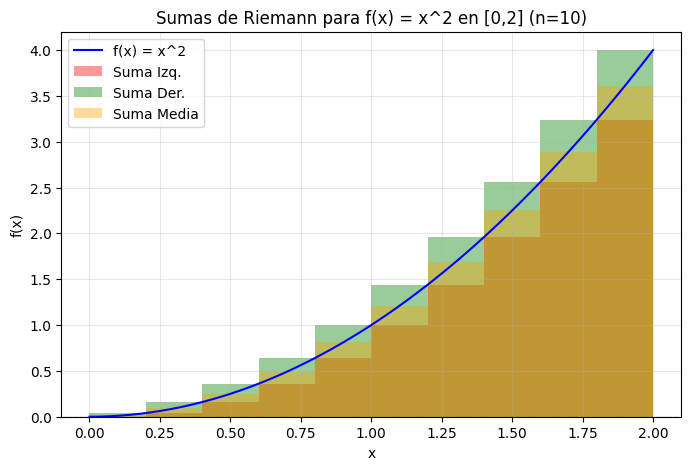

In [ ]:
# @title Gráfico ejemplo sumas de Riemman

# Ejemplo: Aproximación de integral mediante sumas de Riemann
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 1. Definir la función simbólicamente y el intervalo [a, b]
x = sp.symbols('x')
f_expr = x**2                             # función simbólica f(x) = x^2
f = sp.lambdify(x, f_expr, 'numpy')       # convertir función simbólica a función numérica
a, b = 0, 2                               # intervalo de integración de 0 a 2
n = 10                                    # número de subintervalos para las sumas de Riemann

# 2. Calcular puntos relevantes y el ancho de cada subintervalo
x_vals = np.linspace(a, b, 500)           # puntos para graficar la función suavemente
delta_x = (b - a) / n
x_left = np.linspace(a, b - delta_x, n)   # puntos de la partición (izquierda)
x_right = np.linspace(a + delta_x, b, n)  # puntos de la partición (derecha)
x_mid = np.linspace(a + delta_x/2, b - delta_x/2, n)  # puntos medios de cada subintervalo

# 3. Calcular el valor de la función en esos puntos
y_left = f(x_left)
y_right = f(x_right)
y_mid = f(x_mid)

# 4. Graficar la función y las áreas de las sumas de Riemann
plt.figure(figsize=(8, 5))

# Graficar la función continua f(x)
plt.plot(x_vals, f(x_vals), label='f(x) = x^2', color='blue')

# Graficar los rectángulos de la suma de Riemann por la izquierda (en rojo)
for xi, yi in zip(x_left, y_left):
    plt.bar(xi, yi, width=delta_x, align='edge', color='red', alpha=0.4, label='Suma Izq.' if xi == x_left[0] else "")

# Graficar los rectángulos de la suma por la derecha (en verde)
for xi, yi in zip(x_right, y_right):
    plt.bar(xi, yi, width=-delta_x, align='edge', color='green', alpha=0.4, label='Suma Der.' if xi == x_right[0] else "")

# Graficar los rectángulos de la suma por el punto medio (en naranja)
for xi, yi in zip(x_mid, y_mid):
    plt.bar(xi, yi, width=delta_x, align='center', color='orange', alpha=0.4, label='Suma Media' if xi == x_mid[0] else "")

# Líneas y leyenda
plt.title('Sumas de Riemann para f(x) = x^2 en [0,2] (n=10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Ejecuta la celda anterior. Deberías ver la parábola \\(f(x) = x^2\\) y tres conjuntos de rectángulos que aproximan el área bajo la curva: en rojo usando el valor izquierdo de cada subintervalo, en verde usando el derecho, y en naranja usando el punto medio. A medida que aumentes `n` (el número de rectángulos), estas aproximaciones convergerán al valor real de la integral \\(\int\_0^2 x^2 dx = \frac{8}{3} \approx 2.667\\).

## Vizualizador de moléculas 2D

Ahora veamos un ejemplo directamente relacionado con química: visualizar moléculas a partir de sus **códigos SMILES**. Utilizaremos la librería **RDKit**, especializada en química computacional, para dibujar la estructura 2D de una molécula dado su identificador SMILES (una forma de notación lineal para moléculas).

**Paso 1: Instalación de la librería RDKit** (solo es necesario si no está ya instalada en el entorno Colab):

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 33.2 MB/s eta 0:00:00


**Importar las funciones necesarias de RDKit**

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Configurar RDKit para que los dibujos se muestren como SVG (gráficos vectoriales bonitos)
IPythonConsole.ipython_useSVG = True

**Definir una función auxiliar (opcional)** para mostrar índices de átomos en la molécula, de modo que cada átomo tenga un número marcado (útil para identificar posiciones):

In [ ]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

**Generar la molécula a partir de un SMILES y visualizarla**

Vamos a visualizar, por ejemplo, la molécula de **serotonina** cuyo SMILES es `"C1=CC2=C(C=C1O)C(=CN2)CCN"` (si no te dice mucho, no te preocupes, por eso la vamos a dibujar):

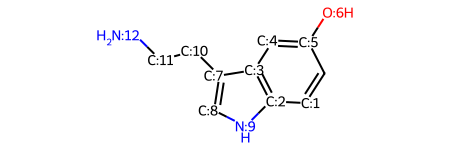

In [ ]:
smiles = "C1=CC2=C(C=C1O)C(=CN2)CCN"  # Serotonina
mol = Chem.MolFromSmiles(smiles)
mol = mol_with_atom_index(mol)       # agregar índices a los átomos
mol  # en Colab, mostrar un objeto mol renderiza la imagen de la molécula

Deberías ver la estructura dibujada de la molécula (un anillo indólico y una cadena lateral con un -OH y un -NH₂). Cada átomo tendrá un número etiquetado.

> **Nota:** Si lo deseas, puedes ir al sitio [PubChem](https://pubchem.ncbi.nlm.nih.gov/) y buscar la molécula que gustes; luego copia su código SMILES en la variable `smiles` para ver su estructura. ¡Prueba con la cafeína, la glucosa, algún fármaco, etc.!

# Ejercicios Prácticos

<p align="center">
  <img src="https://i.gifer.com/7fot.gif" alt="Reacción de Shock" width="400" />
</p>

A continuación te proponemos algunos ejercicios cortos para poner en práctica los fundamentos aprendidos. Trata de resolverlos y luego compara tu enfoque con la solución proporcionada. **¡Manos a la obra!**

### Ejercicio 1: Cálculo de masa molecular

Calcula la **masa molecular** del agua (H₂O) usando las masas atómicas aproximadas del hidrógeno y oxígeno. La fórmula del agua indica que tiene 2 átomos de H y 1 átomo de O.

* Masa atómica del **H** ≈ 1.008 u
* Masa atómica del **O** ≈ 16.00 u

**Objetivo:** Escribe un código que calcule la masa molecular del agua y la imprima en pantalla.

<details><summary><strong>Solución</strong> (haz clic para mostrar):</summary><p>

```python
masa_H = 1.008   # u (unidades de masa atómica)
masa_O = 16.00   # u
masa_agua = 2 * masa_H + 1 * masa_O
print("La masa molecular del agua (H2O) es aproximadamente:", masa_agua, "u")
```

</p></details>

### Ejercicio 2: Clasificación de solución ácida o básica

Escribe un programa que solicite al usuario ingresar el **pH** de una disolución y, con base en el valor ingresado, imprima si la disolución es **ácida**, **básica** o **neutra**. Recuerda: pH < 7 es ácido, pH = 7 es neutro, pH > 7 es básico.

**Objetivo:** Utiliza la función `input()` para leer el pH como cadena, conviértelo a número (`float`), y luego aplica una estructura `if/elif/else` para clasificar el pH.

<details><summary><strong>Solución</strong>:</summary><p>

```python
pH_str = input("Ingresa el pH de la disolución: ")
# Convertir a valor numérico (float)
try:
    pH = float(pH_str)
except:
    print("Valor inválido. Por favor ingrese un número.")
else:
    if pH < 7:
        print("La disolución es ácida 🧪")
    elif pH > 7:
        print("La disolución es básica 🧪")
    else:
        print("La disolución es neutra 🧪")
```

En la solución se incluye un manejo simple de posibles errores de conversión: si el usuario ingresa algo que no es número, el programa avisa. Esto es opcional pero recomendable. Si el valor es numérico, se procede a la clasificación pedida.

</p></details>

### Ejercicio 3: Suma de una lista de masas atómicas

Supón que tienes una molécula de etanol (C₂H₆O) y una lista con las masas atómicas de **cada átomo** de esa molécula. Por ejemplo, una lista para etanol podría ser:

```python
masas = [12.01, 12.01, 1.008, 1.008, 1.008, 1.008, 1.008, 1.008, 16.00]
```

*(En esa lista hay 2 valores de carbono \~12.01, 6 valores de hidrógeno \~1.008, y 1 valor de oxígeno 16.00, correspondientes a C₂H₆O.)*

**Objetivo:** Escribe un programa que use un bucle `for` para recorrer la lista `masas` y calcular la **suma total**, es decir, la masa molecular del etanol. Finalmente, imprime el resultado.

*Pista:* Inicializa una variable `suma_total = 0` y ve agregándole cada valor de la lista dentro del loop.

<details><summary><strong>Solución</strong>:</summary><p>

```python
masas = [12.01, 12.01, 1.008, 1.008, 1.008, 1.008, 1.008, 1.008, 16.00]
suma_total = 0
for m in masas:
    suma_total += m
print("Masa molecular del etanol aproximada:", suma_total, "u")
```

Tras ejecutar este código, deberías obtener alrededor de 46.07 u como masa molecular del etanol. (Si usaras `sum(masas)` directamente también obtendrías el resultado, pero el ejercicio era para practicar el bucle).

</p></details>

# Conclusión

<p align="center">
  <img src="https://media.tenor.com/5wGXzBmbvq4AAAAj/baile-insano-squirtle.gif" alt="Baile" width="400" />
</p>


¡Felicidades! Hemos cubierto mucho terreno en este primer módulo. Vimos desde conceptos básicos de programación hasta ejemplos aplicados en química. Sabemos que abarcar todos los **fundamentos de Python** en un solo módulo es un gran desafío y es normal que aún queden dudas en el aire.

La clave ahora es **practicar**. Con la práctica, irás afianzando cada concepto: crea tus propias variables, prueba operaciones, juega con condicionales y bucles, resuelve ejercicios adicionales… La programación es como un músculo que se desarrolla con el uso constante.

Si alguna duda persiste, recuerda que existen miles de recursos en internet que pueden ser de gran ayuda. La comunidad de Python es enorme y muy dispuesta a ayudar. Algunos lugares y recomendaciones:

# Recursos Adicionales

* **[Stack Overflow](https://es.stackoverflow.com/):** Foro de preguntas y respuestas para dudas puntuales de programación (existe versión en español).
* **[GitHub](https://github.com/):** Plataforma donde puedes explorar proyectos de código abierto (muchos en Python) y aprender del código escrito por otros.
* **[Codédex](https://www.codedex.io/home):** Plataforma interactiva (en español) para aprender Python con ejercicios prácticos.
* **[Documentación oficial de Python](https://docs.python.org/es/3.10/):** Manual de referencia completo de Python (en español, versión 3.10 en este enlace; puedes buscar la versión más reciente).
* **[El Libro de Python](https://ellibrodepython.com/):** Un excelente recurso en español que cubre desde lo básico hasta temas avanzados de Python.
* **[W3Schools - Python](https://www.w3schools.com/python/):** Tutoriales paso a paso y ejemplos prácticos, ideal para repasar conceptos específicos rápidamente.

# Buenas prácticas básicas de programación

Para finalizar este módulo, hablemos de algunas buenas prácticas que conviene adoptar desde el inicio de este viaje en la programación. Estas recomendaciones harán tu código más **legible**, **mantenible** y con menos errores (¡así tus experimentos computacionales serán más reproducibles y confiables!):

* **Nombres descriptivos:** Elige nombres de variables y funciones que describan su propósito. Por ejemplo, `temp_reaccion` es más claro que `t` si representa una temperatura de reacción. Evita nombres excesivamente cortos o genéricos como `x` o `dato` salvo en casos muy simples o índices en bucles. También evita caracteres especiales o espacios (usa guiones bajos `_` para separar palabras). Recuerda que Python es sensible a mayúsculas/minúsculas: `Masa` y `masa` son variables distintas, por lo que manten una convención consistente (por lo general, se usan nombres en minúsculas\_separados\_por\_guiones\_bajos para variables y funciones).
* **Comentarios útiles:** Agrega comentarios (`# comentario`) para explicar *por qué* haces algo, especialmente si el código no es evidente. No es necesario comentar cada línea obvia; enfócate en clarificar partes complejas, supuestos o intentos. Un comentario bien ubicado puede ayudar a otro (o a ti mismo en el futuro) a entender rápidamente el código.
* **Docstrings en funciones:** Ya vimos que puedes incluir una cadena al inicio de la definición de una función para describir su comportamiento. Esto es muy útil porque herramientas como `help(mi_funcion)` mostrarán esa documentación. Acostúmbrate a anotar brevemente lo que hace la función, sus parámetros y lo que devuelve.
* **Formateo y estilo consistente:** Indenta siempre tu código correctamente (Colab lo hace automáticamente en muchos casos). Usa espacios alrededor de operadores (por ejemplo, `a = b + c` en lugar de `a=b+c` para mejor legibilidad). Para bloques lógicos, deja una línea en blanco para separarlos visualmente. Python tiene una guía de estilo oficial llamada **PEP 8**, que puedes consultar como referencia de convenciones (no necesitas memorizarla, pero ser consciente de ella ayuda a escribir código limpio).
* **No reinventes la rueda:** Si necesitas hacer algo complejo, antes de programarlo desde cero, piensa si ya existe un módulo o función que lo provea. Por ejemplo, para matemáticas hay módulos como `math` o `numpy`, para manejo de CSV hay `csv` o `pandas`, etc. Usar las bibliotecas estándar o populares no solo ahorra tiempo sino que suele ser más seguro y eficiente -aunque esto lo veremos en el siguiente módulo-.
* **Prueba y error controlado:** Prueba tu código con datos sencillos para verificar que funciona como esperas (por ejemplo, probar tu función de masa molecular con un compuesto simple conocido). Maneja errores potenciales (como divisiones por cero, archivos no encontrados) usando verificaciones (`if`/`else`) o incluso estructuras como `try/except` (que veremos más adelante). Así evitas que el programa "explote" a mitad de un cálculo importante.
* **Mantén copia de tus trabajos:** En contextos como Google Colab, es buena práctica guardar una copia de seguridad de tu notebook (por ejemplo, en Drive o GitHub). Nunca está de más tener un respaldo de tus códigos, especialmente si los vas a expandir o compartir.

Siguiendo estas buenas prácticas, tu código será más **claro** para ti y otros. ¡Un código limpio equivale a investigaciones más ágiles y colaborativas! Ahora sí, con estos fundamentos en la cabeza, estamos listo para continuar...

# Referencias

1. Downey, A., Elkner, J., & Meyers, C. (2002). *Aprenda a pensar como un programador con Python* (trad. A. Vilella et al.). Green Tea Press. (Versión original: *How to Think Like a Computer Scientist: Learning with Python*).
